## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'

# 5. 데이터 분석
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>

# 5.0. [데이터 분석을 위한 준비과정] 데이터 합치기

#### [5.0.1] 데이터 합치기
* 지금까지 1~4에서 준비한 데이터 파일
    * 버스 정류장 데이터 - df_seoul_bus_station.csv
    * 유동인구 데이터 - df_seoul_moving.csv
    * 구별 등록 인구 데이터 - df_seoul_people.csv
    * 구별 상권 데이터 - df_seoul_business.csv
* 아래 제시되는 'standard' 데이터 프레임을 기준으로 활용하여, 지금까지 1~4에서 준비한 데이터를 각각 불러와서 합쳐 주세요.
* 이후에는 이 합쳐진 데이터 프레임을 기반으로 미션을 수행하기 위한 분석을 진행합니다.

In [1]:
import pandas as pd

In [2]:
# 데이터 합치기 진행 시, 아래 제시되는 정보를 활용하세요.
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']})

In [3]:
stations = pd.read_csv('./df_seoul_bus_station.csv', index_col=0)
stations.head()

,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
자치구,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512
강동구,369,21,2890053,2830506,99.161194,97.118065
강북구,413,67,4825181,4671783,133.020373,128.791504
강서구,566,49,4681083,4652828,88.119480,87.587591
관악구,466,86,7655819,7792476,154.753674,157.516040


In [4]:
moving = pd.read_csv('./df_seoul_moving.csv', index_col=0)
moving.head()

,이동시간 평균,이동인구 평균,이동시간 합,이동인구 합,유입인구,유출인구
자치구,,,,,,
강남구,23.094565,90.226636,11437560,44684651.43,21506979.64,21575290.87
강동구,25.670084,64.249687,8430800,21101460.33,6993710.01,7032537.23
강북구,23.811274,39.128470,7649610,12570412.30,6526754.03,6531790.60
강서구,25.124068,58.447282,9388010,21839762.06,8452096.73,8207681.45
관악구,23.377928,49.904036,8772170,18725641.04,9232253.88,9238658.13


In [5]:
people = pd.read_csv('./df_seoul_people.csv', index_col=0)
people.head()

,세대,합계 계,합계 남자,합계 여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
자치구,,,,,,,,,,,,
종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [6]:
business = pd.read_csv('./df_seoul_business.csv', index_col=0)
business.head()

,택시운송업 종사자수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 종사자수,두발미용업 종사자수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 종사자수,일반 교과 학원 종사자수,한식 육류요리 전문점 종사자수
자치구,,,,,,,,,,
종로구,215,5912,646,889,480,3613,962,1413,382,1982
중구,235,6414,333,1152,816,3542,24248,982,175,2121
용산구,523,2987,466,1214,777,2076,317,1332,573,1184
성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545
광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678


In [7]:
res = pd.concat([stations, moving, people, business], axis=1)
res.to_csv('df_final.csv')
res

,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동시간 평균,이동인구 평균,이동시간 합,이동인구 합,...,택시운송업 종사자수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 종사자수,두발미용업 종사자수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 종사자수,일반 교과 학원 종사자수,한식 육류요리 전문점 종사자수
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,...,2517,11486,487,6508,6255,7273,8320,2528,9020,5008
강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,21101460.33,...,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459
강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.128470,7649610,12570412.30,...,2589,2663,1030,867,997,1095,94,1275,740,1176
강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,9388010,21839762.06,...,6922,4584,1862,2352,1751,2530,700,1709,2347,2274
관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,...,2027,3689,1600,2136,1604,2049,190,1672,1230,1628
광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,...,1744,2861,985,1313,1337,1887,687,1577,1646,1678
구로구,486,79,4942197,4730992,119.235615,114.140076,22.933748,41.739382,7946750,14463071.65,...,3817,3215,1351,1213,1134,1384,923,1165,1111,1496
금천구,345,58,3776658,3581930,123.098370,116.751304,23.998944,30.597875,6362000,8111343.74,...,2598,2619,997,1381,715,1215,2575,685,487,1042
노원구,514,57,4353295,4292724,88.476211,87.245168,24.029515,55.184590,8975240,20611941.03,...,6074,2650,1736,1053,1353,1748,123,844,3281,1557


# 5.1.가설 수립

## 5.1.1.가설 수립 
+ 어떤 데이터를 label 데이터(y)로 해야 할 지 생각해보아 정하세요.
    * 설정한 가설에 따라(가설 마다) y는 다를 수 있습니다. 개인/조 마다 y는 다를 수 있습니다.
+ 가설의 개수는 제한이 없습니다. (조 별로 적어도 3개 이상 설정하세요.)
+ 가설 예시
    * 가설 1 정류장 수와 승차 총 승객수
        * H0 : 정류장 수와 승차 총 승객수는 연관이 없다
        * H1 : 정류장 수와 승차 총 승객수는 연관이 있다
    * 가설 2 노선 수와 총 이동시간
        * H0 : 노선 수와 총 이동시간은 연관이 없다
        * H1 : 노선 수와 총 이동시간은 연관이 있다
    * 가설 3 정류장 수와 이동인구(합)
    * 가설 4 노선 수와 평균 이동 시간
    * 가설 5 노선 수와 커피전문점 이용자수

In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.



## 5.1.2.단변량 분석

* 아래 제시되는 내용들을 참고하여 단변량 분석을 진행합니다. 
    * 변수의 비즈니스 의미  
    * 변수가 숫자형인지 범주형인지 판단하여 진행
    * 전처리가 필요한지 확인하고 필요 시 진행: NaN 존재 여부 및 조치 방안, 가변수화 대상여부  
    * 기초통계량 분석
    * 데이터 분포 분석  
    * 위 정보로부터 파악한 내용을 비즈니스 관점에서 정리  
    * 추가 분석해볼 사항 도출하여 추가 분석 진행
* 이 프로젝트에서 비즈니스 관점이라 함은 데이터를 분석하는 목적이 어디에 있는가 하는 것을 고려하자는 것입니다.
    * 즉, "서울시 내 어느 자치구에 버스노선 추가가 필요한지를 분석하여 합리적으로 결정하려는 목적"을 가지고 데이터에 근거하기 위해 데이터를 분석하고 정리해야 한다는 의미입니다.

In [9]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


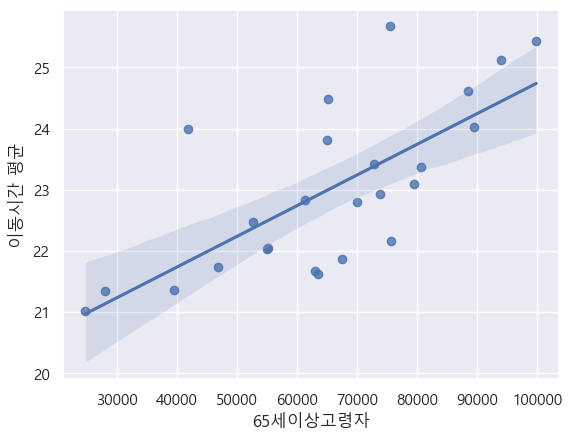

In [10]:
sns.regplot(x='65세이상고령자', y='이동시간 평균', data=res)
plt.show()

In [11]:
temp = res
temp['65세이하'] = res['65세이상고령자']/res['합계 계']
temp['65세이상 비율'] = res['65세이상고령자']/res['합계 계']
temp['65세이하 비율'] = res['65세이하']/res['합계 계']
temp.head()

,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동시간 평균,이동인구 평균,이동시간 합,이동인구 합,...,부동산 중개 및 대리업 종사자수,두발미용업 종사자수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 종사자수,일반 교과 학원 종사자수,한식 육류요리 전문점 종사자수,65세이하,65세이상 비율,65세이하 비율
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,...,6508,6255,7273,8320,2528,9020,5008,0.148091,0.148091,2.756015e-07
강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,21101460.33,...,1990,1429,1660,1433,1349,2104,1459,0.162282,0.162282,3.489214e-07
강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.128470,7649610,12570412.30,...,867,997,1095,94,1275,740,1176,0.215944,0.215944,7.178401e-07
강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,9388010,21839762.06,...,2352,1751,2530,700,1709,2347,2274,0.162379,0.162379,2.807249e-07
관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,...,2136,1604,2049,190,1672,1230,1628,0.161264,0.161264,3.223107e-07


In [12]:
temp = res
temp['정류장수/노선수대비'] = res['버스정류장수']/res['노선수']

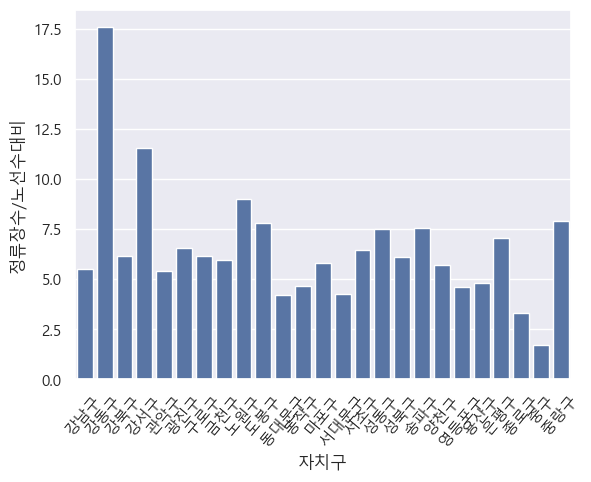

In [13]:
sns.barplot(y='정류장수/노선수대비', x='자치구', data=temp)
plt.xticks(rotation=50)
plt.show()

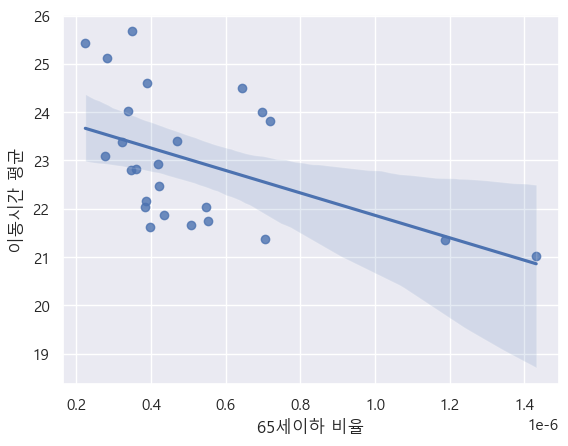

In [14]:
sns.regplot(x='65세이하 비율', y='이동시간 평균', data=temp)
plt.show()

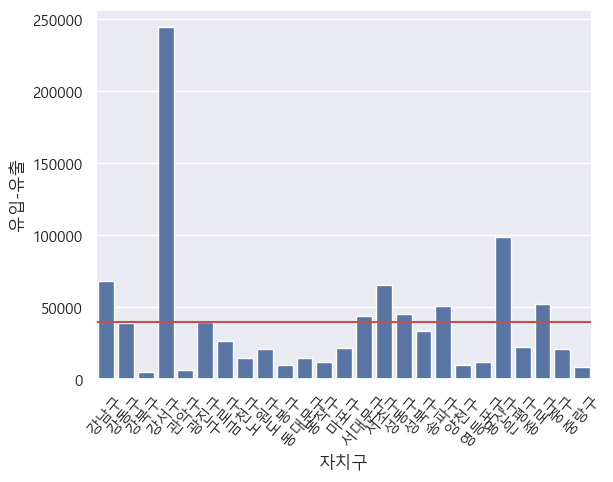

In [15]:
tmp = res
tmp['유입-유출'] = abs(res['유입인구'] - res['유출인구'])
sns.barplot(y='유입-유출' ,x='자치구', data=tmp)
plt.axhline(tmp['유입-유출'].mean(), color='r')
plt.xticks(rotation = 50)
plt.show()

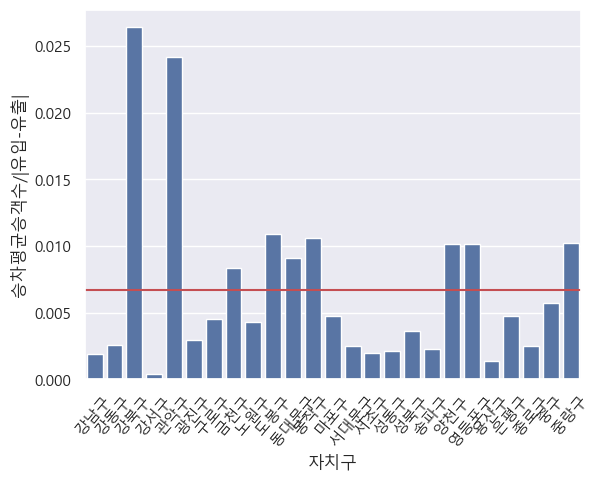

In [16]:
tmp = res
tmp['승차평균승객수/|유입-유출|'] = res['승차평균승객수']/(abs(res['유입인구'] - res['유출인구']))
sns.barplot(y='승차평균승객수/|유입-유출|' ,x='자치구', data=tmp)
plt.axhline(tmp['승차평균승객수/|유입-유출|'].mean(), color='r')
plt.xticks(rotation = 50)
plt.show()

## 5.1.3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 시각화와 수치화(가설검정)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1
* p-value 기준 판단 기준
    * P-value < 0.05이면, 두 변수 간에 관계가 있다. (상관계수가 의미가 있다.)
    * P-value >= 0.05이면, 두 변수 간에 관계가 없다. (상관계수가 의미가 없다.)

In [17]:
import scipy.stats as spst

# 아래에 코드를 작성하고 결과를 확인합니다.


## 5.1.4.관계 정리

### 1) 강한 관계의 변수

In [18]:
# 강한 관계의 변수는 무엇인가요?
# 예) 정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

In [19]:
# 중간 관계의 변수는 무엇인가요?
# 예) 노선수 - 커피전문점.1(종사자수)

## 5.1.5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇인가요?

In [20]:
# 솔루션 도출
# 예) 강남구 - 중구 - 동대문구 - 관악구에 필요합니다